<a href="https://colab.research.google.com/github/Siddheshdumre/NLP_Lab/blob/main/NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy
!pip install nltk
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 84.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd
import spacy
import requests
from bs4 import BeautifulSoup
nlp = spacy.load("en_core_web_sm")
pd.set_option("display.max_rows", 200)


In [3]:
content = "Presidential elections were held in the United States on November 5, 2024.The Republican Party's ticket—Donald Trump, who was the 45th president of the United States from 2017 to 2021, and JD Vance, the junior U.S. senator from Ohio—defeated the Democratic Party's ticket—Kamala Harris, the incumbent vice president, and Tim Walz, the 41st governor of Minnesota. Trump and Vance were inaugurated as the 47th president and the 50th vice president on January 20, 2025."

doc = nlp(content)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)


the United States 36 53 GPE
November 5 57 67 DATE
2024.The Republican Party's 69 96 ORG
Donald Trump 104 116 PERSON
45th 130 134 ORDINAL
the United States 148 165 GPE
2017 171 175 DATE
2021 179 183 DATE
JD Vance 189 197 PERSON
U.S. 210 214 GPE
Ohio 228 232 GPE
the Democratic Party's 242 264 ORG
Kamala Harris 272 285 PERSON
Tim Walz 321 329 PERSON
41st 335 339 ORDINAL
Minnesota 352 361 GPE
Trump 363 368 ORG
Vance 373 378 PERSON
47th 403 407 ORDINAL
50th 426 430 ORDINAL
January 20, 2025 449 465 DATE


In [4]:
from spacy import displacy
displacy.render(doc, style="ent")


In [5]:
entities = [(ent.text, ent.label_, ent.lemma_) for ent in doc.ents]
df = pd.DataFrame(entities, columns=['text', 'type', 'lemma'])
print(df)


                           text     type                        lemma
0             the United States      GPE            the United States
1                    November 5     DATE                   November 5
2   2024.The Republican Party's      ORG  2024.the Republican Party's
3                  Donald Trump   PERSON                 Donald Trump
4                          45th  ORDINAL                         45th
5             the United States      GPE            the United States
6                          2017     DATE                         2017
7                          2021     DATE                         2021
8                      JD Vance   PERSON                     JD Vance
9                          U.S.      GPE                         U.S.
10                         Ohio      GPE                         Ohio
11       the Democratic Party's      ORG       the Democratic Party's
12                Kamala Harris   PERSON                Kamala Harris
13                  

In [8]:
pd.set_option("display.max_rows", 200)

url = "https://hyperbolicdesigns.com/" #@param {type:"string"}
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
text = soup.get_text()

doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

displacy.render(doc, style="ent")

entities = [(ent.text, ent.label_, ent.lemma_) for ent in doc.ents]
df = pd.DataFrame(entities, columns=['text', 'type', 'lemma'])
df

Hyperbolic Designs 5 23 NORP
HyperbolicDesigns 41 58 NORP
Us 198 200 GPE
Hyperbolic Designs 213 231 NORP
Hyperbolic Designs 264 282 NORP
two 304 307 CARDINAL
Soham Boravke 333 346 ORG
Siddhesh Dumre 351 365 PERSON
Soham 511 516 ORG
Hyperbolic Designs 785 803 NORP
Reach Us







Services 937 961 ORG
Responsive Medical/Hospital Website 1677 1712 ORG
Fitness Club
Responsive 1724 1747 ORG
Hyperbolic Bakery
Bakery Ecommerce 1813 1847 ORG
Advertizing Website 1852 1871 PERSON
Hyperbolic 1913 1923 NORP
Our Features





Our team of expert designers creates 1997 2051 WORK_OF_ART
PPC 3035 3038 ORG
Hyperbolic Designs 3155 3173 NORP
Hyperbolic 3226 3236 NORP
2023 3277 3281 DATE
Hyperbolic 3295 3305 NORP


,text,type,lemma
0,Hyperbolic Designs,NORP,Hyperbolic design
1,HyperbolicDesigns,NORP,HyperbolicDesigns
2,Us,GPE,we
3,Hyperbolic Designs,NORP,hyperbolic design
4,Hyperbolic Designs,NORP,Hyperbolic Designs
5,two,CARDINAL,two
6,Soham Boravke,ORG,Soham Boravke
7,Siddhesh Dumre,PERSON,Siddhesh Dumre
8,Soham,ORG,Soham
9,Hyperbolic Designs,NORP,Hyperbolic design


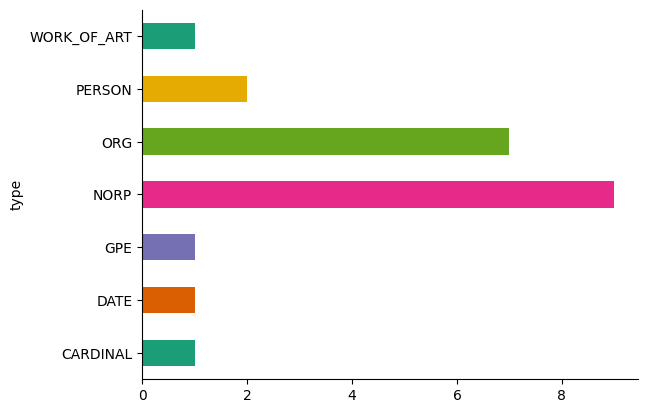

In [11]:

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)